In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
file_path =r'C:\Users\Admin\Documents\GitHub\brazilian-ecommerce-capstone\data\raw\olist_products_dataset.csv'
df_products = pd.read_csv(file_path)
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [7]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [8]:
df_products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [10]:
df_products['product_category_name'].fillna('unknown', inplace=True)


In [11]:
df_products[['product_name_lenght', 'product_description_lenght', 'product_photos_qty']] = \
df_products[['product_name_lenght', 'product_description_lenght', 'product_photos_qty']].fillna(0)


In [12]:
df_products.info()
df_products.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              2
product_length_cm             2
product_height_cm             2
product_width_cm              2
dtype: int64

In [13]:
df_products.dropna(inplace=True)


In [14]:
df_products.info()
df_products.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 32949 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32949 non-null  object 
 1   product_category_name       32949 non-null  object 
 2   product_name_lenght         32949 non-null  float64
 3   product_description_lenght  32949 non-null  float64
 4   product_photos_qty          32949 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

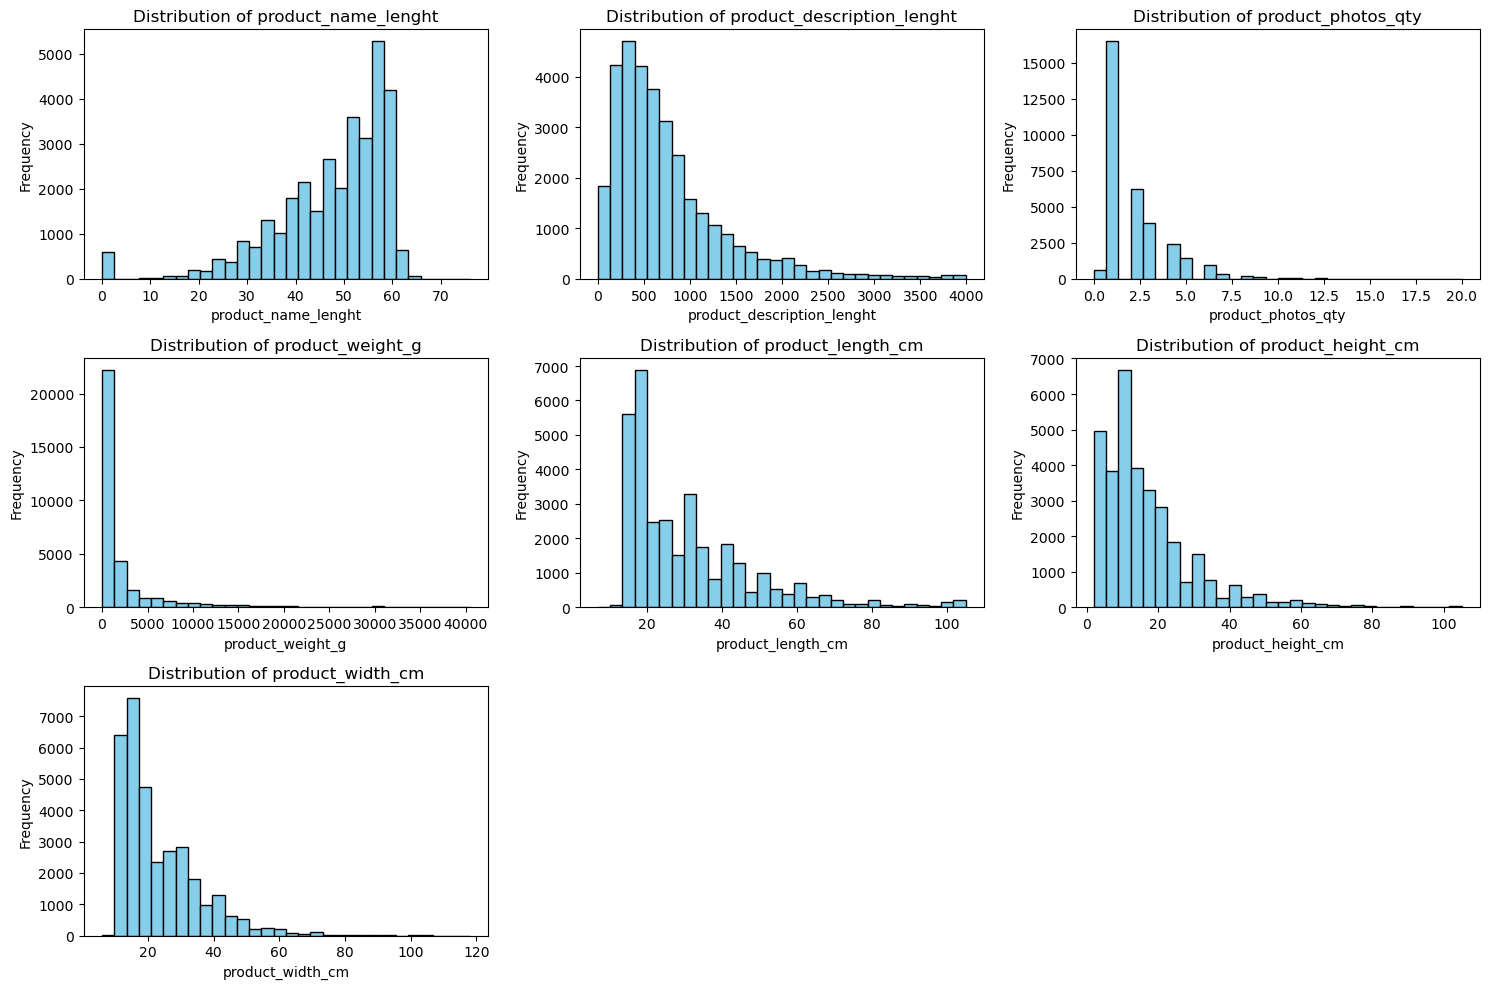

In [15]:
# Loop through all numeric columns and create histograms
# Subplot 3x3 grid for organized layout
# Custom bins, color, and labels
# Shows distributions for quick EDA insights
numeric_cols = [
    'product_name_lenght', 'product_description_lenght', 'product_photos_qty',
    'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    plt.hist(df_products[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


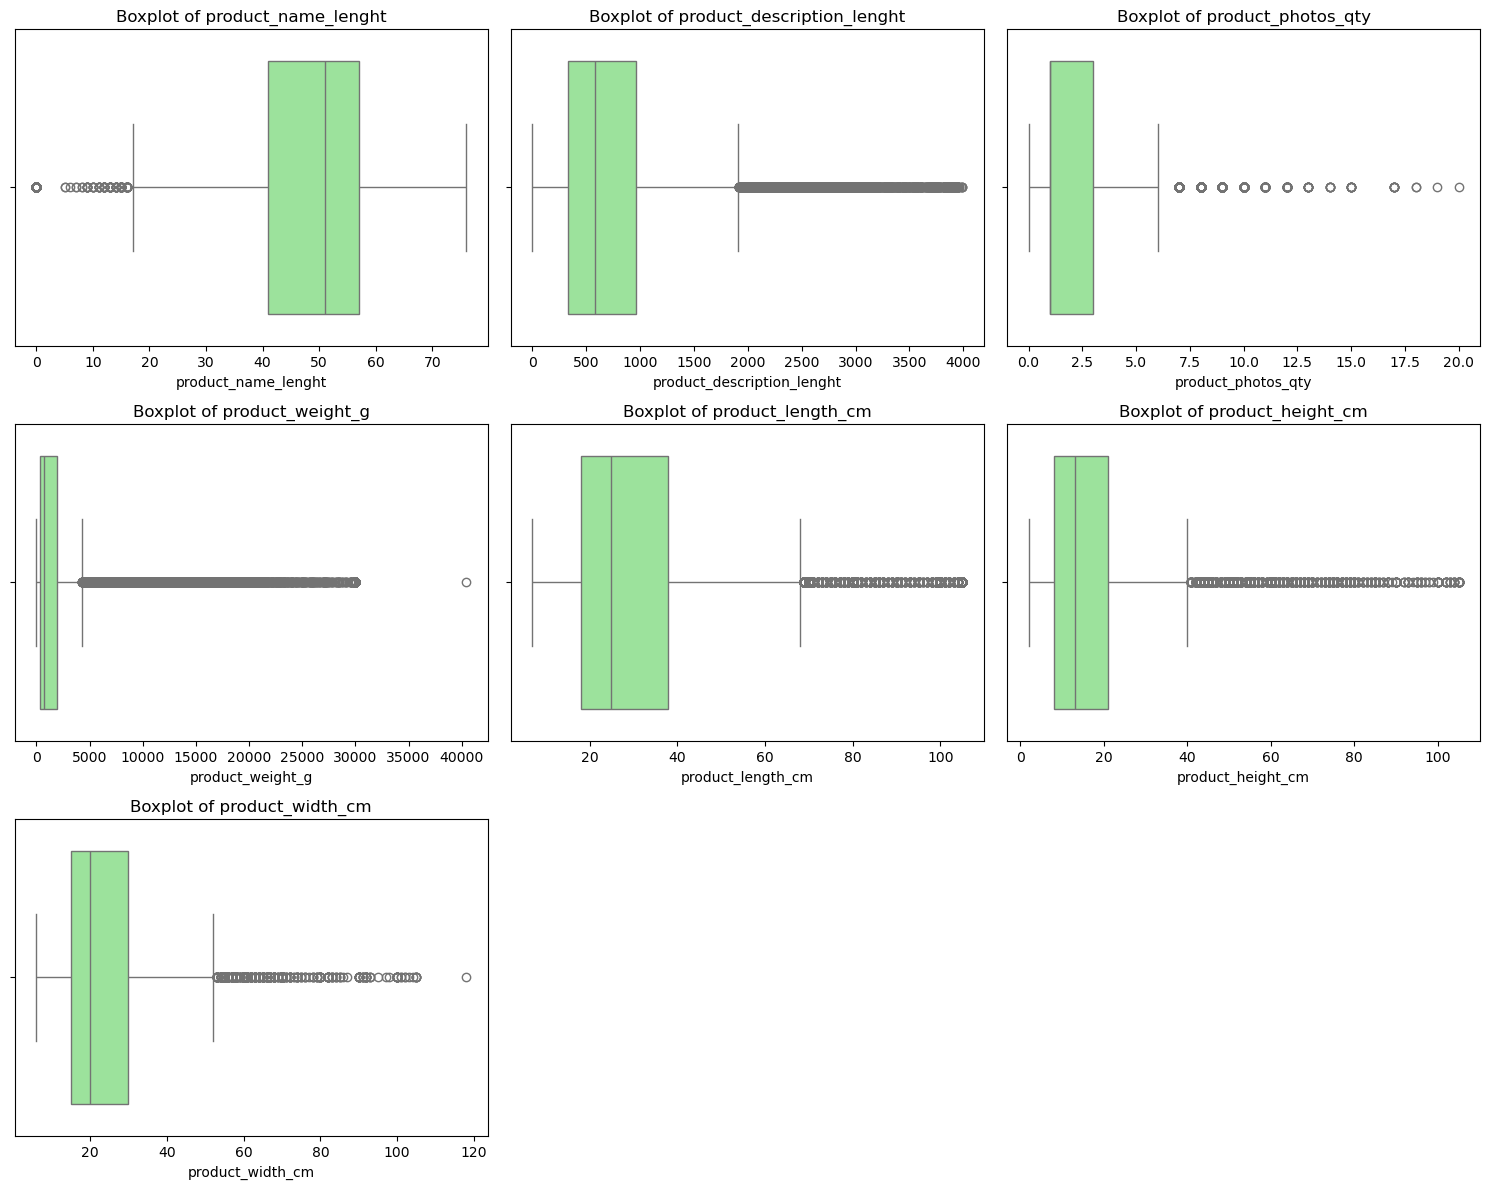

In [17]:
import seaborn as sns

# Set up plot grid
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_products, x=col, color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


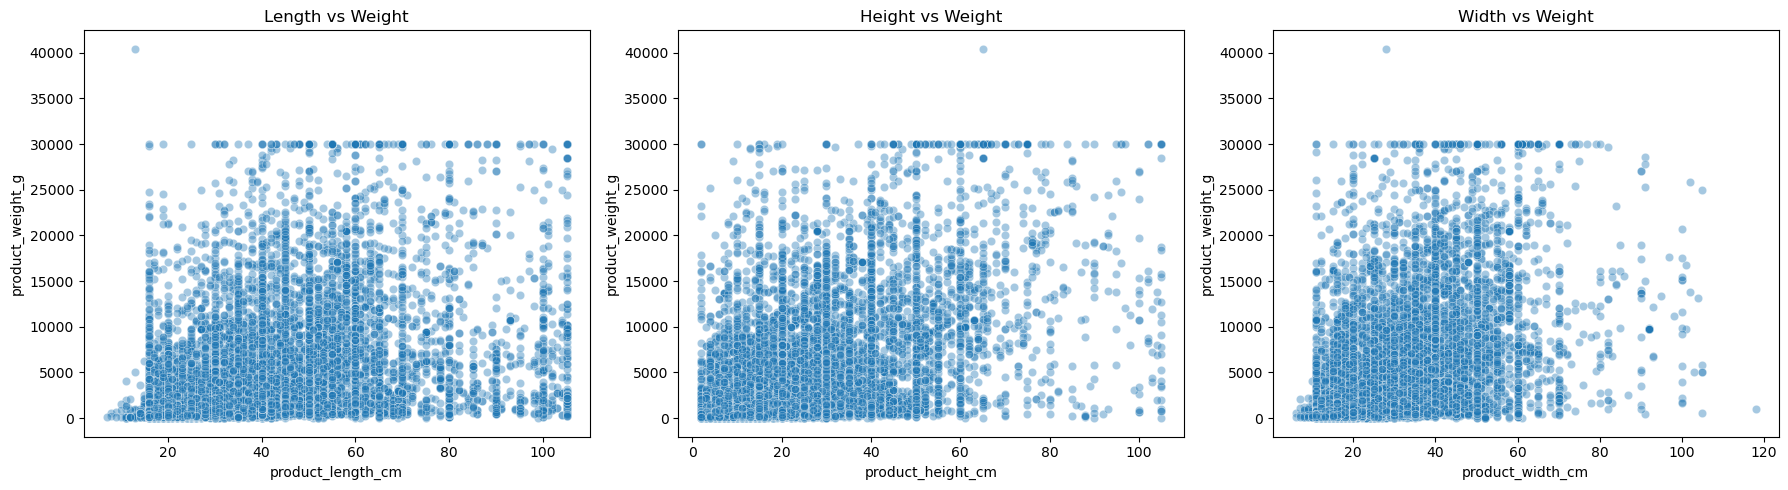

In [18]:
# Scatter plots for dimension vs weight relationships
plt.figure(figsize=(18, 5))

# Length vs Weight
plt.subplot(1, 3, 1)
sns.scatterplot(data=df_products, x='product_length_cm', y='product_weight_g', alpha=0.4)
plt.title('Length vs Weight')

# Height vs Weight
plt.subplot(1, 3, 2)
sns.scatterplot(data=df_products, x='product_height_cm', y='product_weight_g', alpha=0.4)
plt.title('Height vs Weight')

# Width vs Weight
plt.subplot(1, 3, 3)
sns.scatterplot(data=df_products, x='product_width_cm', y='product_weight_g', alpha=0.4)
plt.title('Width vs Weight')

plt.tight_layout()
plt.show()
